In [156]:
import numpy as np

price = np.array([6, 6.05, 6.1])
volume = np.array([802000, 967000, 1132000])
cost_coef = 0.55
oper_coef = 0.15

cash_flow = ( 1 -  cost_coef ) * (1 - oper_coef ) * ( 1 - 0.32) * price * volume   
cash_flow = np.append(-3400000, cash_flow )
npv = np.npv(0.1,cash_flow)
irr = np.irr(cash_flow)

print(npv)
print(irr)

344796.1010518393
0.15331410149124514


In [157]:

import numpy.random as npr
import timeit

npr.seed(69)

numb_iter = 10000

def npv_mc():
    npv_all = []
    irr_all = [] 
    for i in np.arange(numb_iter):  
        
        price = npr.triangular([5.9,5.95,6], [6,6.05,6.1],  [6.1,6.15,6.2] , 3)
        volume = npr.normal([802,967,1132], [25,30,25], 3) * 1000
        cost_coef = npr.triangular(0.5, 0.55, 0.65) 
        oper_coef = npr.normal(0.15, 0.02) 
        
        cash_flow = ( 1 - cost_coef ) * (1 - oper_coef ) * ( 1 - 0.32) * price * volume   
        cash_flow = np.append(-3400000, cash_flow )  
        
        npv_all = np.append(npv_all, np.npv(0.1,cash_flow))
        irr_all = np.append(irr_all, np.irr(cash_flow))
    
    
print(timeit.timeit(npv_mc, number=1))

npv_mean =  np.mean(npv_all)
irr_mean =  np.mean(irr_all)
    
print(npv_mean)
print(irr_mean)
    
      


3.6883177409999917
203432.65621762574
0.13108503619015233


In [158]:

numb_iter = 100

def npv_mc_no():
   
    npv_all = []
    irr_all = [] 
    
    price1 = np.random.triangular(5.9, 6, 6.1, numb_iter)
    price2 = np.random.triangular(5.95, 6.05, 6.15, numb_iter)
    price3 = np.random.triangular(6, 6.1, 6.2, numb_iter) 
    
    volume1 = np.random.normal(802, 25, numb_iter) * 100
    volume2 = np.random.normal(967, 30, numb_iter) * 100
    volume3 = np.random.normal(1132, 25, numb_iter) * 100
        
    cost_coef = npr.triangular(0.5, 0.55, 0.65,numb_iter) 
    oper_coef = npr.normal(0.15, 0.02,numb_iter) 
    
    npv_all = { np.npv(0.1, np.append(-340000, ( 1 - 0.32)*(1 - oper_coef[i])*(1 - cost_coef[i])*np.array([price1[i]*volume1[i], price2[i]*volume2[i], price3[i]*volume3[i]])))  for i in np.arange(numb_iter)}  
    irr_all = { np.irr(np.append(-340000, ( 1 - 0.32)*(1 - oper_coef[i])*(1 - cost_coef[i])*np.array([price1[i]*volume1[i], price2[i]*volume2[i], price3[i]*volume3[i]])))  for i in np.arange(numb_iter)}  
     
npv_mc_no()


print(np.mean(npv_all))
print(np.mean(irr_all))
   

203432.65621762574
0.13108503619015233


In [96]:




price = npr.triangular([5.9,5.95,6], [6,6.05,6.1],  [6.1,6.15,6.2] , 3)
volume = npr.normal([802,967,1132], [25,30,25], 3) * 1000
cost_coef = npr.triangular(0.5, 0.55, 0.65) 
oper_coef = { npr.normal([802,967,1132], [25,30,25], 3) * 1000   for i in range(100) }
        
   
    
 
print(oper_coef)   
    
#cash_flow = ( 1 - cost_coef ) * (1 - oper_coef ) * ( 1 - 0.32) * price * volume   
#cash_flow = np.append(-3400000, cash_flow )  
        
        

TypeError: unhashable type: 'numpy.ndarray'

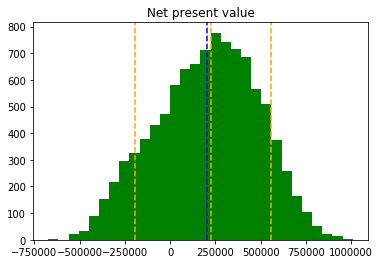

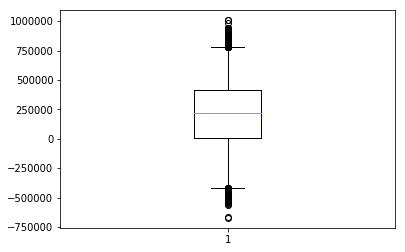

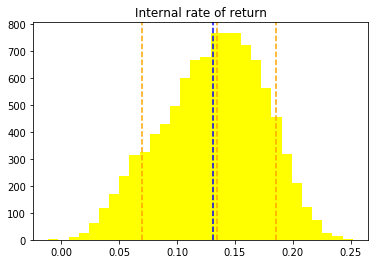

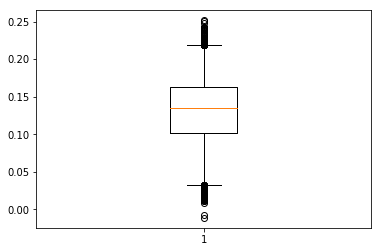

In [110]:
import matplotlib.pyplot as plt 

plt.hist(npv_all, bins= 30, align='mid', histtype='bar', facecolor='green') 
plt.title('Net present value') 
plt.axvline(x=npv_mean,linestyle='dashed',color='blue') 
plt.axvline(x=np.percentile(npv_all, 10),linestyle='dashed',color='orange') 
plt.axvline(x=np.percentile(npv_all, 50),linestyle='dashed',color='orange') 
plt.axvline(x=np.percentile(npv_all, 90),linestyle='dashed',color='orange') 
plt.show()

plt.boxplot(npv_all, whis=[1, 99],  widths=0.2)
plt.show()

plt.hist(irr_all, bins=30, align='mid',histtype='bar', facecolor='yellow') 
plt.title('Internal rate of return') 
plt.axvline(x=irr_mean,linestyle='dashed',color='blue') 
plt.axvline(x=np.percentile(irr_all, 10),linestyle='dashed',color='orange') 
plt.axvline(x=np.percentile(irr_all, 50),linestyle='dashed',color='orange') 
plt.axvline(x=np.percentile(irr_all, 90),linestyle='dashed',color='orange') 
plt.show()

plt.boxplot(irr_all, whis=[1, 99],  widths=0.2)
plt.show()




In [111]:
a = [12, 3, 45, 0, 45, 47, 109, 1, 0, 3]
np.quantile(a, 25)

AttributeError: module 'numpy' has no attribute 'quantile'

In [125]:
price = npr.triangular([5.9,5.95,6], [6,6.05,6.1],  [6.1,6.15,6.2] )
print (price)      

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [138]:
npr.triangular([5.9,5.95,6], [6,6.05,6.1],  [6.1,6.15,6.2] , 3)  * npr.normal([802,967,1132], [25,30,25], 3) * 1000 

array([4901557.40406817, 5839224.14912445, 6918835.37083759])

In [151]:

numb_iter = 10000

def npv_mc_no():
   
    npv_all = []
    irr_all = [] 
    
    profit = { npr.triangular([5.9,5.95,6], [6,6.05,6.1],  [6.1,6.15,6.2] , 3)  * npr.normal([802,967,1132], [25,30,25], 3) * 1000  for i in np.arange(numb_iter) }    
        
    cost_coef = npr.triangular(0.5, 0.55, 0.65,numb_iter) 
    oper_coef = npr.normal(0.15, 0.02,numb_iter) 
    
    npv_all = { np.npv(0.1, np.append(-340000, ( 1 - 0.32)*(1 - oper_coef[i])*(1 - cost_coef[i]) * profit[i] ))  for i in np.arange(numb_iter)}  
    irr_all = { np.irr(np.append(-340000, ( 1 - 0.32)*(1 - oper_coef[i])*(1 - cost_coef[i])* profit[i] ))  for i in np.arange(numb_iter)}  
    

print(timeit.timeit(npv_mc_no, number=1))


print(np.mean(npv_all))
print(np.mean(irr_all))


IndexError: index 3 is out of bounds for axis 0 with size 3

In [155]:

numb_iter = 10000

def npv_mc_no():
   
    npv_all = []
    irr_all = [] 
    
    price1 = np.random.triangular(5.9, 6, 6.1, numb_iter)
    price2 = np.random.triangular(5.95, 6.05, 6.15, numb_iter)
    price3 = np.random.triangular(6, 6.1, 6.2, numb_iter) 
    
    volume1 = np.random.normal(802, 25, numb_iter) * 100
    volume2 = np.random.normal(967, 30, numb_iter) * 100
    volume3 = np.random.normal(1132, 25, numb_iter) * 100
        
    cost_coef = npr.triangular(0.5, 0.55, 0.65,numb_iter) 
    oper_coef = npr.normal(0.15, 0.02,numb_iter) 
    
    npv_all = { np.npv(0.1, np.append(-340000, ( 1 - 0.32)*(1 - oper_coef[i])*(1 - cost_coef[i])*np.array([price1[i]*volume1[i], price2[i]*volume2[i], price3[i]*volume3[i]])))  for i in np.arange(numb_iter)}  
    irr_all = { np.irr(np.append(-340000, ( 1 - 0.32)*(1 - oper_coef[i])*(1 - cost_coef[i])*np.array([price1[i]*volume1[i], price2[i]*volume2[i], price3[i]*volume3[i]])))  for i in np.arange(numb_iter)}  
    

print(timeit.timeit(npv_mc_no, number=1))


print(np.mean(npv_all))
print(np.mean(irr_all))


2.276911007998933
203432.65621762574
0.13108503619015233


In [152]:
 profit = {  for i in np.arange(numb_iter) }    


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
npr.triangular([5.9,5.95,6], [6,6.05,6.1],  [6.1,6.15,6.2] , 3)  * npr.normal([802,967,1132], [25,30,25], 3) * 1000 